<a href="https://colab.research.google.com/github/ttjh1234/Study_MLDL/blob/main/chapter04_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#확률적 경사 하강법

이번 장에서는 확률적 경사 하강법을 이해하고,

대량의 데이터에서 분류 모델을 훈련하는 방법을 공부한다.

문제 상황 : 데이터가 한 번에 준비되지않고, 조금씩 전달되는 상황.

해별방안 


1.   기존의 훈련 데이터에 새로운 데이터를 활용해 모델을 훈련
*   새로운 데이터를 사용하여 훈련할 수 있지만, 시간이 지날수록 데이터가 늘어남 
2.   새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기 일정화
*   데이터를 버릴때 다른 데이터에 없는 중요한 데이터가 버려질 수 있다. 

따라서 앞서 훈련한 모델을 버리지않고, 새로운 데이터에 대해서 조금씩 더 훈련하는 방법

=> **점진적 학습**, **온라인 학습**

대표적인 점진적 학습 알고리즘으로 확률적 경사 하강법이 있다.

사실 확률적 경사 하강법은 K-최근접 이웃 분류,회귀나 회귀분석 처럼 모델은 아니고, 

최적화를 할 수 있게끔 도와주는 알고리즘이다.





**확률적 경사 하강법** : train_set에서 랜덤하게 하나의 샘플을 고르는 것

**미니 배치 경사 하강법** : 무작위로 몇 개의 샘플을 선택해서 경사하강법을 수행, 

보통 2의 거듭제곱수들을 사용

**배치 경사 하강법** : 전체 데이터를 사용하여 경사하강법 진행, 가장 안정적인 방법이지만,

자원을 많이 사용하게 된다.

**epoch** : 확률적 경사 하강법에서 train_set을 한 번 모두 사용하는 과정

**손실함수** : 확률적 경사 하강법이 최적화할 대상.

어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준.

**로지스틱 손실 함수 (이진 크로스엔트로피 손실함수, binary cross-entropy loss function)**

타깃이 이진 분류 일때,

1.   타깃이 양성(=1) : -log(예측확률)
2.   타깃이 음성(=0) : -log(1-예측확률) 

타깃이 다중 분류일때는 **크로스엔트로피 손실 함수** 를 사용한다.

회귀에서는 **평균 절댓값 오차** 나 **평균 제곱 오차** 를 손실 함수로 사용한다.

500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  
/usr/local/lib/python3.6/dist-packages/numpy/lib/scimath.py:272: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)


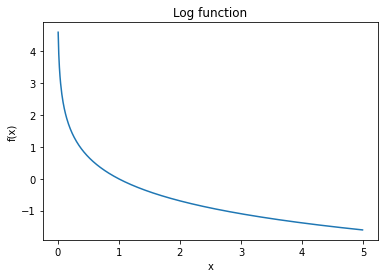

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import log
x=np.arange(0,5,0.01)
print(len(x))
y=-log(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Log function')
plt.show()

In [2]:
print(-log(0.9))
print(-log(0.2))
print(-log(1))

0.10536051565782628
1.6094379124341003
-0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  This is separate from the ipykernel package so we can avoid doing imports until


**로지스틱 손실 함수 (이진 크로스엔트로피 손실함수, binary cross-entropy loss function)**

로지스틱 손실함수의 예시로,

양성일 때 예측확률이 0.9인경우 -log(0.9) 값은 대략 0.11으로 손실이 매우작지만,

음성일 때 예측확률이 양성 확률이 0.8일경우 -log(1-0.8) 값은 1.60 으로 손실이 매우 크다.

즉, 분류모형에서 양성일 때 양성일 확률, 음성일 때 음성일 확률이 높으면 손실이 적게되는 것을 알 수 있다. => 정확한 분류를 할 시 손실 함수의 값은 작아진다. 



## SGDClassifier

데이터는 'https://bit.ly/fish_csv' 를 사용한다.

**SGDClassifier**를 이용해 로지스틱 회귀의 **최적화**를 하기 위해서 데이터들의 scale을 같게 해준다.

sklearn.linear_model의 **SGDClassifier** 를 사용해 확률적 경사 하강법을 사용한다.

In [3]:
import pandas as pd
fish=pd.read_csv('https://bit.ly/fish_csv')
x=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(x[:5])
y=fish['Species'].to_numpy()
print(y[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


sklearn.model_selection의 **train_test_split**을 사용하여

train_set과 test_set을 나누며, 

sklearn.preprocessing의 **StandardScaler** 를 통해 표준화 한다.

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train=ss.transform(x_train)
x_test=ss.transform(x_test)


확률적 경사 하강법을 사용하기위해 sklearn.linear_model의 **SGDClassifier**를 사용,

로지스틱 손실 함수로 사용하고, max_iter=10으로 에포크 횟수를 10으로 제한해서 해보겠다.

In [5]:
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(x_train,y_train)
print('train_set의 정확도 : ',sc.score(x_train,y_train))
print('test_set의 정확도 : ',sc.score(x_test,y_test))

train_set의 정확도 :  0.773109243697479
test_set의 정확도 :  0.775


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


위 **ConvergenceWarning** 경고는 모델이 충분히 수렴하지 않았다는 경고

이럴 경우 max_iter 매개변수의 값을 늘려주는 것이 좋음.

SGDClassifier 객체를 사용하여 점진적 학습을 진행해본다.

다시 **fit** 메소드를 사용하면 **이전에 학습했던 가중치들을 제거하고 새로만들기 때문에**,

**partial_fit** 메소드를 사용하여 추가로 훈련을 시킨다.

In [6]:
sc.partial_fit(x_train,y_train)
print('train_set의 정확도 : ',sc.score(x_train,y_train))
print('test_set의 정확도 : ',sc.score(x_test,y_test))

train_set의 정확도 :  0.8151260504201681
test_set의 정확도 :  0.825


## 에포크와 과대/과소 적합

예전에 배웠던 회귀 모형에서 과소 적합과 과대 적합을 보았었는데, 

그 때는 **규제**를 통해 조정할 수 있었다. (**Ridge,Lasso**)

에포크가 적으면 훈련한 모델은 train_set 과 test_set에 맞지 않는 과소적합이 될 확률이 높고,

에포크가 많으면 train_set에 너무 잘맞아 과대적합이 될 확률이 높다.

따라서 에포크의 **적절한 값**을 찾아주는게 중요 포인트이다.

train_set의 모형에대한 정확도는 epoch가 증가함에 따라 꾸준히 증가하지만,

test_set의 정확도는 꾸준히 증가하다가 감소하는 시점이 있다.

이 지점에서 훈련을 멈추는 것을 **조기 종료** 라고 한다.

In [7]:
import numpy as np
sc=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(y_train)
print(classes[:])

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [8]:
for _ in range(0,300):
  sc.partial_fit(x_train,y_train,classes=classes)
  train_score.append(sc.score(x_train,y_train))
  test_score.append(sc.score(x_test,y_test))


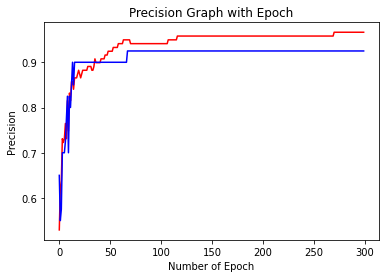

In [9]:
import matplotlib.pyplot as plt
plt.plot(train_score,c='Red')
plt.plot(test_score,c='Blue')
plt.xlabel('Number of Epoch')
plt.ylabel('Precision')
plt.title('Precision Graph with Epoch')
plt.show()

데이터가 작아서 명확하게 드러나진 않지만, 100번째 에포크 부터  test_set과 train_set의 차이가 벌어지며, 에포크 초기단계에서는 두 set다 과소적합을 보인다.

적절한 조기종료를 100으로 두고 모델을 다시 훈련하겠다.


In [10]:
sc=SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(x_train,y_train)
print('train_set의 정확도 : ',sc.score(x_train,y_train))
print('test_set의 정확도 : ',sc.score(x_test,y_test))

train_set의 정확도 :  0.957983193277311
test_set의 정확도 :  0.925


SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지않고 자동으로 멈춘다.

**tol** 매개변수는 향상될 최솟값을 지정하고, 

**n_iter_no_change**는 지정한 에포크 동안 손실이 tol 만큼 줄어들지 않으면 알고리즘이 중단된다.

위 문제에서는 epoch가 100번 모두 다하기 위해 tol값을 None으로 설정하여 진행했다.

In [11]:
sc=SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(x_train,y_train)
print('train_set의 정확도 : ',sc.score(x_train,y_train))
print('test_set의 정확도 : ',sc.score(x_test,y_test))

train_set의 정확도 :  0.9495798319327731
test_set의 정확도 :  0.925


확률적 경사 하강법을 사용한 분류 모델 : **SGDClassifier** 을 사용

확률적 경사 하강법을 사용한 회귀 모델 : **SGDRegressor** 을 사용

SGDClassifier 의 loss 매개변수의 기본값은 'hinge' 이며,

힌지 손실은 SVM(서포트벡터머신)이라고 불리는 알고리즘의 손실함수이다.